In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit
import sqlite3

In [5]:
#connect
conn = sqlite3.connect("Resources/hawaii.sqlite")
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()
# cur is calling cursor. how you grab stuff out of the file. 
# cur.execute("Select * From measurement order by Date DESC")
# rows = cur.fetchall()

# for row in rows:
#     print (row)

In [6]:
#date and time formats sqlite https://www.sqlite.org/lang_datefunc.html
cur.execute("SELECT id, Date(date) as dt from measurement where (strftime('%s', 'now')) order by dt DESC limit 10")
rows = cur.fetchall()

#execute and fetchall are methods of cursor 
 #sql statement goes in execute method
# cur.execute("SELECT strftime('%s','Date(date)') from measurement")    
# rows = cur.fetchall()

for row in rows:
    print(row)
# strftime('%s','now')



(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


In [7]:
cur.execute("SELECT id, Date(date) as dt from measurement where dt < Date('now') order by dt DESC limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


In [8]:
#return those within 2 years of today
cur.execute("SELECT id, Date(date) as dt from measurement where (strftime('%s','now') - strftime('%s', date)) < 60*60*24*365*2  order by dt DESC limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(2724, '2017-08-23')
(7635, '2017-08-23')
(12187, '2017-08-23')
(19550, '2017-08-23')
(2723, '2017-08-22')
(12186, '2017-08-22')
(19549, '2017-08-22')
(2722, '2017-08-21')
(7634, '2017-08-21')
(12185, '2017-08-21')


# Exploratory Climate Analysis

In [9]:
# limit is like head.. just display 

cur.execute("SELECT max(date) FROM measurement")
cur.fetchall()


[('2017-08-23',)]

In [10]:
# Calculate the date 1 year ago from the last data point in the database
cur.execute("SELECT Date(datetime(strftime('%s', date) - 60*60*24*364, 'unixepoch', 'localtime')) as dt from measurement ORDER BY dt DESC limit 1")
cur.fetchall()

[('2016-08-23',)]

In [11]:
# Perform a query to retrieve the date and precipitation scores

# Design a query to retrieve the last 12 months of precipitation data and plot the results
cur.execute("SELECT date, prcp FROM measurement WHERE Date(date) >= Date(""'" + "2016-08-23" + "'"")  and Date(date) <= Date(""'" + "2017-08-23" + "'"")  ORDER BY date ASC")
data = cur.fetchall()

# for record in data:
#     print(record)

In [12]:

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data)
data_df.rename(columns={0:'Date',1:'Precipitation'}, inplace=True)
data_df = data_df.set_index('Date')
data_df.head()
data_df.to_csv("MySavedImages/data.csv")
# Sort the dataframe by date

data_df.sort_values(by='Date', ascending=False).head()

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.50


In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_df = pd.read_csv("MySavedImages/data.csv")


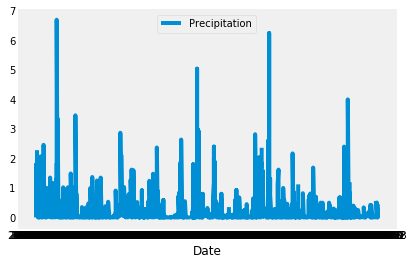

In [14]:
plt.plot(plot_df['Date'], plot_df['Precipitation'])
plt.xlabel("Date")
plt.legend(loc=9)
plt.grid()
plt.show()

In [15]:
plt.savefig('MySavedImages/line.png')

<Figure size 432x288 with 0 Axes>

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [17]:
plot_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
cur.execute("SELECT COUNT(station) from station")
cur.fetchall()

[(9,)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

cur.execute("SELECT station, count(station) from measurement GROUP BY station ORDER BY 2 DESC")
cur.fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
cur.execute("SELECT max(tobs), min(tobs), avg(tobs) FROM measurement WHERE station = 'USC00519281'")
cur.fetchall()

[(85.0, 54.0, 71.66378066378067)]

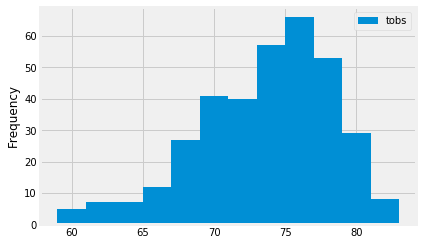

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cur.execute("SELECT tobs FROM measurement WHERE station = 'USC00519281' AND Date(date) >= Date(""'" + "2016-08-23" + "'"")  and Date(date) <= Date(""'" + "2017-08-23" + "'"")  ORDER BY date ASC")
x = cur.fetchall()
df_hist=pd.DataFrame({"tobs":x})
df_hist1=pd.DataFrame(df_hist["tobs"].tolist())
df_hist1.rename(columns={0:'tobs'}, inplace=True)
df_hist1.plot.hist(bins=12)
# num_bins = 12
# plt.legend(labels="tobs", loc="best")
# # n, bins, patches = 
# plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [22]:
plt.savefig("MySavedImages/Hist.png")

<Figure size 432x288 with 0 Axes>